In [1]:
import pandas as pd 
import numpy as np 
from utils.utility_functions import *
from src.MetNormalizer import MetNorm

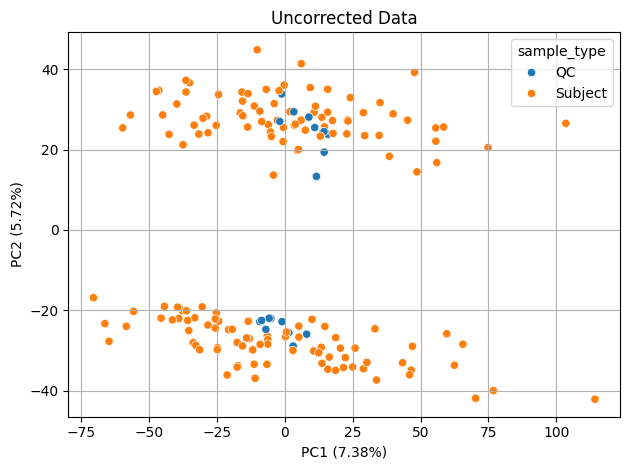

In [2]:
M = pd.read_csv("MetNormalizer-Diagram/sample.info.csv")
D = pd.read_csv("MetNormalizer-Diagram/data.csv")

M = M.set_index("sample.name")

D = D.set_index("name").iloc[:,2:].T
M.columns = M.columns.str.replace("class","sample_type")
pca_plot(D,M,title='Uncorrected Data')

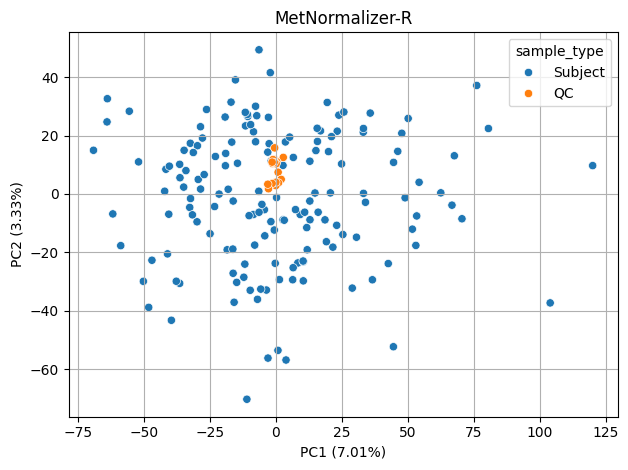

In [3]:
D = pd.read_csv("MetNormalizer-Diagram/svr_normalization_result/data_svr_normalization.csv")
D = D.set_index("name").iloc[:,5:]
D = D.T
pca_plot(D,M,title='MetNormalizer-R')

In [4]:
D

name,1,2,3,4,5,6,7,8,9,10,...,13922,13923,13924,13925,13926,13927,13928,13929,13930,13931
AOU_S_0001,4.413549e+01,8.660984e+05,4.443684e+07,4.298913e+01,285117.437877,1.581226e+06,43.619388,9.441930e+07,2.005006e+07,1.154822e+08,...,202.669064,67.165321,2872.787099,69.756404,48.371613,742.429707,1183.707756,1402.543512,39.185208,2257.691755
AOU_S_0081,4.413549e+01,8.617726e+05,5.291829e+07,4.298913e+01,317302.883787,2.021989e+06,43.687971,9.283223e+07,1.697471e+07,7.557805e+07,...,1831.677288,67.165321,2776.476067,69.756404,884.300336,13509.030872,41.675388,52.252875,48.463844,55.317929
AOU_S_0002,4.413549e+01,7.892064e+05,8.665742e+07,4.298913e+01,279506.159474,1.571969e+06,43.649719,1.011826e+08,2.527379e+05,1.184132e+08,...,7942.115288,67.165321,56.559999,69.756404,47.389546,3547.755023,2022.252200,4146.403360,1500.365158,2331.348157
AOU_S_0082,4.413549e+01,8.186926e+05,5.164480e+07,4.298913e+01,289283.401706,1.754652e+06,43.673898,9.899198e+07,2.700992e+05,1.183441e+08,...,28.503639,67.165321,73.377053,69.756404,1658.127694,2453.727443,39.466968,43.019230,2039.040470,4009.043038
AOU_S_0003,4.413550e+01,7.441350e+05,3.959166e+07,4.298913e+01,282126.763439,1.583622e+06,43.687378,9.159484e+07,1.063883e+06,1.029360e+08,...,1606.524539,67.165321,56.722290,69.756404,626.834453,2762.755024,30.528387,2515.437895,1980.446229,2366.450617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AOU_SP_016,4.285477e+06,1.240081e+06,6.682213e+07,1.327314e+07,478930.122576,1.639312e+06,388109.637030,9.757306e+07,9.977655e+06,1.171914e+08,...,2951.467812,1341.860097,2279.598184,1972.201869,726.210475,64.547507,4048.641352,47.753707,1483.888444,2391.783573
AOU_SP_008,4.537099e+06,1.158490e+06,6.909863e+07,1.344700e+07,566732.303725,1.281700e+06,424087.326767,9.908666e+07,1.084119e+07,1.087971e+08,...,307.072723,1364.602855,1888.544055,1544.577039,947.113584,31.769246,1539.219554,1945.984735,1660.120201,1409.055299
AOU_SP_017,4.287339e+06,1.207271e+06,6.683175e+07,1.327435e+07,493796.123991,1.650870e+06,390270.981743,9.681593e+07,9.963378e+06,1.114292e+08,...,1533.720482,71.006213,3384.857559,238.524871,947.816825,3073.033113,840.158827,1968.390136,1468.529081,2521.618179
AOU_SP_009,4.351892e+06,1.205278e+06,6.798721e+07,1.327711e+07,483860.921079,1.423796e+06,407272.081671,9.401583e+07,1.049830e+07,1.100113e+08,...,1125.198164,302.022948,2088.434926,1531.461694,1313.137991,4651.132274,95.108642,1941.714031,3199.331788,2166.411439


In [5]:
metnorm = MetNorm(D,M,cv=False)

In [6]:
results = metnorm.fit_transform()

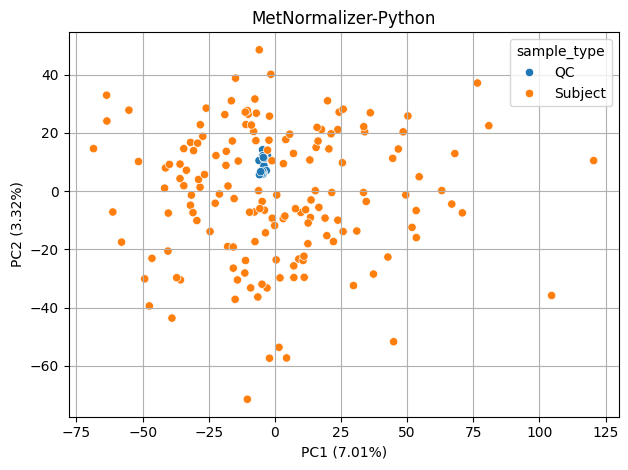

In [7]:
pca_plot(results,M,title='MetNormalizer-Python')